# Food Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('food_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [4]:
# Write your code here
# We can use the shape function of the DataFrame
print(f"The number of rows and columns in the given dataset are {df.shape[0]} and {df.shape[1]} respectively")

The number of rows and columns in the given dataset are 1898 and 9 respectively


#### Observations:
* The shape is an attribute of the DataFrame containing a tuple with two elements. The first element represents the number of rows and the second element represent the number of columns
* The FoodHub_Order dataset contains `1898` rows and `9` columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* There are three different data types: int64, object and float64.
* The rating column is suppose to be a number out of 5. But we are seeing it as object type. The reason is there are string values also in few of the rows. As we can see in the above listing, one of the possible string value we have seen is "Not given".
* order_id, customer_id are of int64 type.
* cost_of_the_order is float64. Which will contain the decimal values
* food_preparation_time, delivery_time are int64. It make sense because they are represented in the number of minutes only.
* The rest of the columns are string type values having object type


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [6]:
# Write your code here
# we can isna or isnull functions for this
df.isna().values.any()

False

In [7]:
# another way of doing this will be
# Note that isna() will return False or True. False is represented with 0 and True is represented with 1. 
#  Therefore we can use sum() function
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
* There are no missing values in any food order row

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [8]:
# Write your code here
# Statistical summary can be checked with descriptive statics method on the DataFrame i.e., describe
#   The include='all' paramter helps in taking the object type columns along with the numeric ones
#   The dot T attribute helps see the output in a vertical form. Rather than horizontal. This helps in avoiding the
#       scrolls to the right when there are too many columns in our dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
Regarding the food preparation time(in minutes):
* The minimum is **20mins**
* The average(mean) is **~27mins**. Note the mean from the data is **27.317197**, but given the data is in mins which is of type int64, we can consider the integer part of it after rounding the values.
* The maximum is **35mins**


### **Question 5:** How many orders are not rated?

In [9]:
# Write the code here
# We can utilise the value_counts function on the 'rating' column for this
df.rating.value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [10]:
# To get the feel of the distribution of these counts in the given data set, 
#  let us use set the normalize paramter in the above function
df.rating.value_counts(normalize=True)

rating
Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: proportion, dtype: float64

#### Observations:
* There are **736** unrated food records out of the total **1898** orders. This is about **38.7%** of the total orders.
* We must replace the _**Not given**_ value in these rows with some numeric value in order to fully utilise. But what value shall be assigned is an interesting question to be asked.
* May be it needs to be derived based on the other parameters like restaurant_name, cuisine_type, food_preparation_time, delivery_time etc., 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

# order_id
* Unique ID of the order
* Do not really contribute to explain the nature of order. Therefore can be ignored in statisical analysis
* This column shall be used in linking or tracking the food orders

In [11]:
# Write the code here
df.order_id.value_counts()

order_id
1477147    1
1477697    1
1477555    1
1478028    1
1478308    1
          ..
1478087    1
1476775    1
1478421    1
1476774    1
1478056    1
Name: count, Length: 1898, dtype: int64

## Observation
* **order_id** seem to be a seven digit number
* The value_counts output length is matching the total orders in the dataset. Therefore we can conclude that there are no duplicate orders in the dataset.

# customer_id 
* ID of the customer who ordered the food
* Can be used to link the customer with the respective orders

In [12]:
df.customer_id.value_counts()

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64

# Observation
* The value_counts length is **1200**. This means there are 1200 unique customer orders in the dataset.
* The scenarios of same customer placing multiple orders exist in the dataset (There are about **698** _(1898 - 1200)_ such orders)
* The customer ids do not seem to follow a fixed number of digits pattern. They vary from 5 to 6 digits
* The customer with id `52832` is having the maximum orders **13** placed followed by the customer with id `47440` and orders **10**
* There are more than one customer who has placed a single order

# restaurant_name
* Name of the restaurant

In [13]:
df.restaurant_name.value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

In [14]:
df.restaurant_name.value_counts(normalize=True)

restaurant_name
Shake Shack                  0.115385
The Meatball Shop            0.069547
Blue Ribbon Sushi            0.062698
Blue Ribbon Fried Chicken    0.050580
Parm                         0.035827
                               ...   
Sushi Choshi                 0.000527
Dos Caminos Soho             0.000527
La Follia                    0.000527
Philippe Chow                0.000527
'wichcraft                   0.000527
Name: proportion, Length: 178, dtype: float64

# Observation
* There are **178** different restaurants in our dataset
* **Shake Shack** seem to have received the maximum number of orders _(219)_ which is 11.5% of market share followed by **The Meatball Shop** _(132)_, which is about 6.9% of market share

# cuisine_type
* Cuisine ordered by the customer

In [15]:
cuisine_counts = df.cuisine_type.value_counts()
print(cuisine_counts)
print(f"Total unique cuisines: {len(cuisine_counts)}")

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64
Total unique cuisines: 14


# Observation
* There are 14 different types of cuisine_types available in our food order dataset
* The top cuisine_type is **American** followed by **Japanese** and others
* Since 14 is a manageble number on a pie chart visualization. Let us plot the distribution

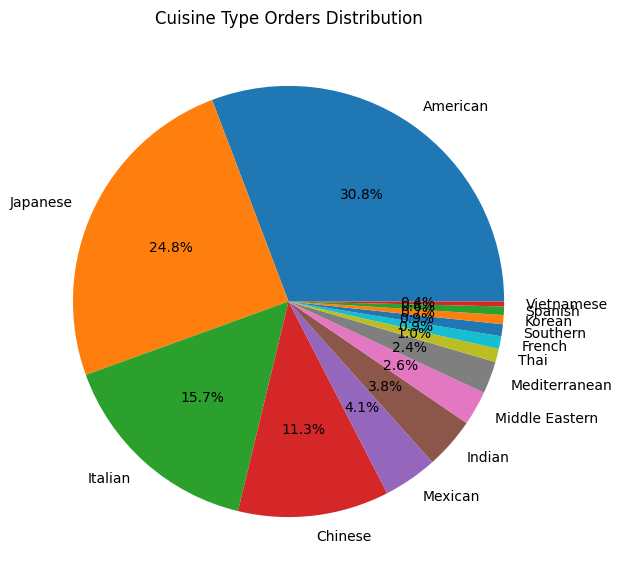

In [16]:
# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(cuisine_counts, labels=cuisine_counts.index, autopct='%1.1f%%')
plt.title('Cuisine Type Orders Distribution')
plt.show()

# cost
* Cost of the order

In [17]:
df.cost_of_the_order.describe().T

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

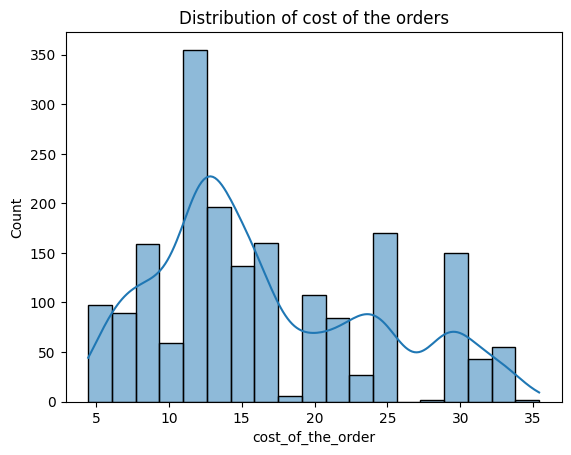

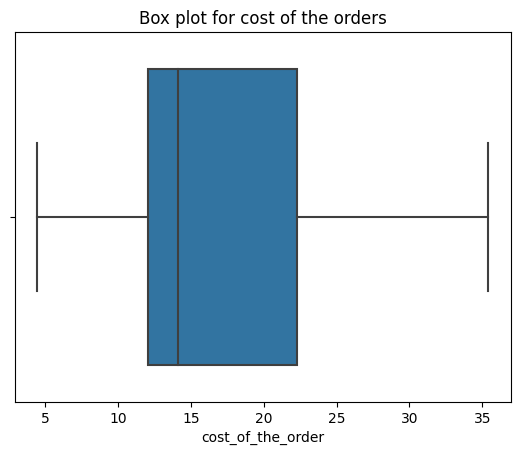

In [18]:
sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.title('Distribution of cost of the orders')
plt.show()
sns.boxplot(data=df, x= 'cost_of_the_order')
plt.title('Box plot for cost of the orders')
plt.show()


# Observation
* The cost of the order seem to have multiple modalities. Given that we have two market segments namely `Students` and `Busy Professionals`. It may good idea to relate the peak seen between 10 and 15 dollar range with `Students` and the peaks between 20 to 25 and 25 to 30 with `Busy Professionals`
* The max. cost of the order is **35.41 dollars**
* The min. cost of the order is **4.47 dollars**
* The average cost of the orders is **16.49 dollars**
* The distribution is **Right Skewed**. Therefore the mean _(16.49)_ is greater the median value _(14.14)_
* The inter quartile range Q3 - Q1 = 22.297500 - 12.080000 = **10.2175 dollars**
* No outliers are identified

# day_of_the_week
* Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)

In [19]:
day_week_counts = df.day_of_the_week.value_counts()
print(day_week_counts)

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64


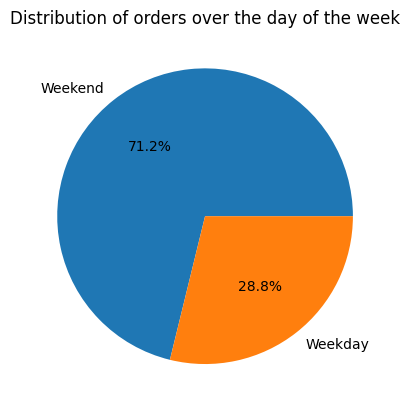

In [20]:
plt.pie(day_week_counts, labels=day_week_counts.index, autopct='%1.1f%%')
plt.title('Distribution of orders over the day of the week')
plt.show()

# Observation
* The food orders placed during the weekend is way greater compare to the orders placed during the weekdays

# rating
* Rating given by the customer out of 5

In [21]:
rating_counts = df.rating.value_counts()
print(rating_counts)

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


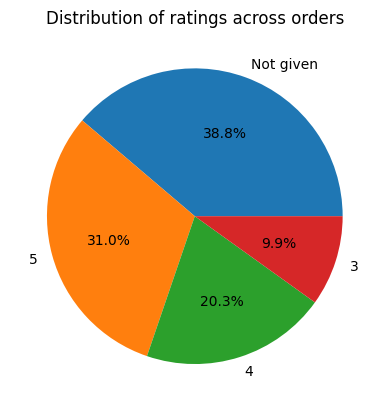

In [22]:
plt.pie(rating_counts, labels = rating_counts.index, autopct='%1.1f%%')
plt.title('Distribution of ratings across orders')
plt.show()

# Observation
* The minumum rating observed is **3**. Does this mean the rating scale is from 3 to 5? Need to check with the data colleciton team
* About **38.8%** of the orders are not rated.
* Could this be becuase:
  * The rating feature is introduced into the FoodHub app later?
  * The users are not concerned about rating every order?
  * The rating UI is not in the right place to encourage users to rate?
  * Were there technical issues in the system while users are rating?
* Is there a possibility to derive this value based on the remaining data?

# food_preparation_time
Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.

In [23]:
df.food_preparation_time.describe().T

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

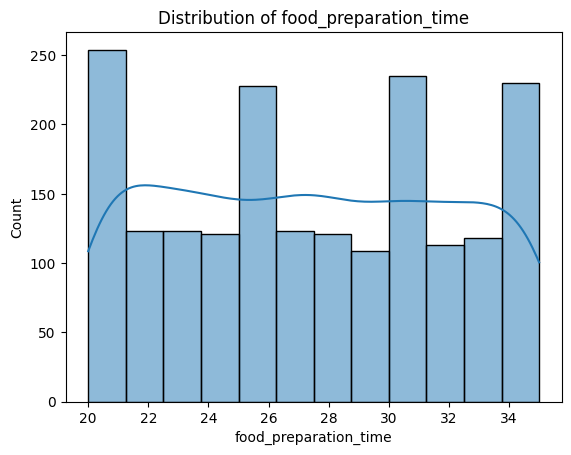

In [24]:
sns.histplot(data=df, x='food_preparation_time', kde=True)
plt.title('Distribution of food_preparation_time')
plt.show()

<Axes: xlabel='food_preparation_time'>

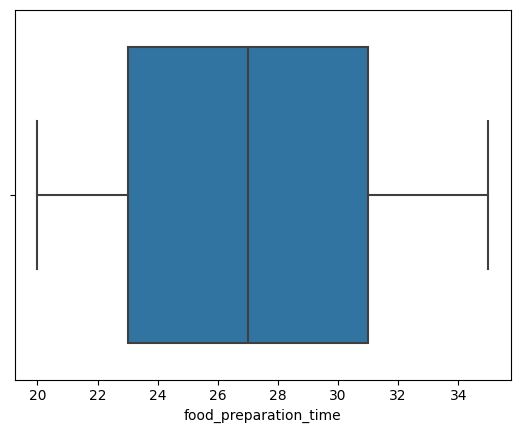

In [25]:
sns.boxplot(data=df, x='food_preparation_time')

# Observation
* The max. food prepartion time is **35 mins**
* The min. food prepartion time is **20 mins**
* The average food prepartion time is **27.37 mins**
* The distribution is almost **symmetrical**. Therefore the mean _(27.37)_ is almost equal the median value _(27)_
* The inter quartile range Q3 - Q1 = 31 - 23 = **8 mins**
* No outliers are identified

# delivery_time
* Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [26]:
df.delivery_time.describe().T

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

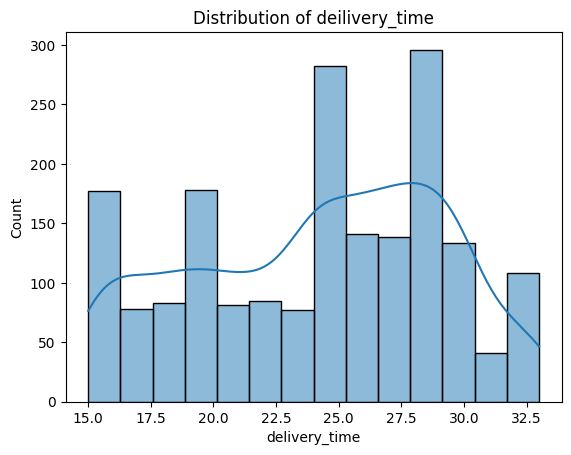

In [27]:
sns.histplot(data=df, x='delivery_time', kde=True)
plt.title('Distribution of deilivery_time')
plt.show()

<Axes: xlabel='delivery_time'>

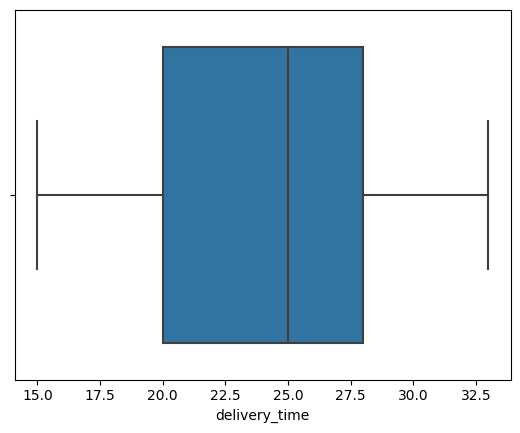

In [28]:
sns.boxplot(data=df, x='delivery_time')

# Observation
* The max. delivery time is **33 mins**
* The min. delivery time is **15 mins**
* The average delivery time is **24.16 mins**
* The distribution is **left skewed**. Therefore the mean _(24.16)_ is less than the median value _(28)_
* The inter quartile range Q3 - Q1 = 28 - 20 = **8 mins**
* No outliers are identified

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [29]:
# Write the code here
restaurant_counts = df.restaurant_name.value_counts()
restaurant_counts

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

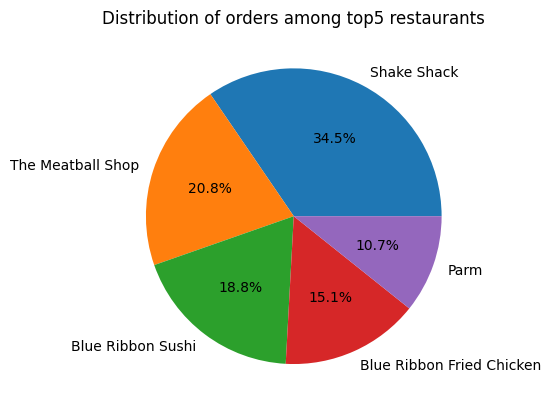

In [30]:
top_5 = restaurant_counts[:5]
plt.pie(top_5, labels=top_5.index, autopct="%1.1f%%")
plt.title("Distribution of orders among top5 restaurants")
plt.show()

#### Observations:
The top 5 restaurants are:
1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm

Clearly, Shake Shack is out performaing all the others

### **Question 8**: Which is the most popular cuisine on weekends?

In [31]:
# Write the code here
# filter the weekend data and find the value counts for the cusinie_type
weekend_data = df[df.day_of_the_week=='Weekend']
weekend_data_counts = weekend_data.cuisine_type.value_counts()
weekend_data_counts

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

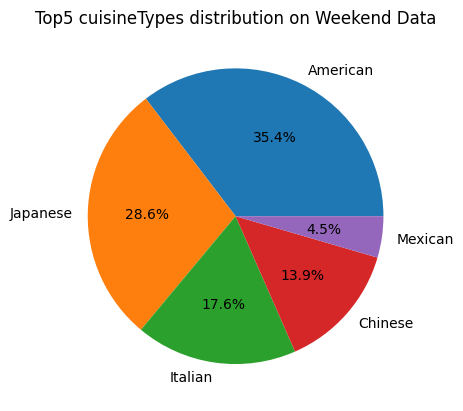

In [32]:
plt.pie(weekend_data_counts[:5], labels=weekend_data_counts[:5].index, autopct='%1.1f%%')
plt.title('Top5 cuisineTypes distribution on Weekend Data')
plt.show()

#### Observations:
The most popular cuisine type on the weekends is **American** with **415** orders 

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [33]:
# Write the code here
total_orders = len(df)
num_orders_greater_than_20 = len(df[df.cost_of_the_order > 20])
print(f"The number of orders greater than 20 dollars is: {num_orders_greater_than_20}")
percentage = (num_orders_greater_than_20 / total_orders) * 100
percentage

The number of orders greater than 20 dollars is: 555


29.24130663856691

#### Observations:
There are **29.24%** of orders with cost more than 20 dollars

### **Question 10**: What is the mean order delivery time?

In [34]:
# Write the code here
df.delivery_time.mean()

24.161749209694417

#### Observations:
The mean order delivery time is: **24.16 mins**

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [35]:
# Write the code here
df.customer_id.value_counts()

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64

#### Observations:
* In the first place we have the customer_id **52832** with the **13** orders placed.
* In the second place we have the customer_id **47440** with the **10** orders placed.
* In the third place we have the customer_id **83287** with the **9** orders placed.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

In [36]:
# Write the code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


# Observation
* The order_id and customer_id will be holding unique values. Therefore we can ignore them in the multivariate analysis

In [37]:
df_copy = df.drop(['order_id', 'customer_id'], axis=1)
df_copy.head()

,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,Dirty Bird to Go,American,11.59,Weekday,4,25,24


# Examine the numerical data for the relationships

/Users/irfanbashasheik/anaconda3/envs/great_learning/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


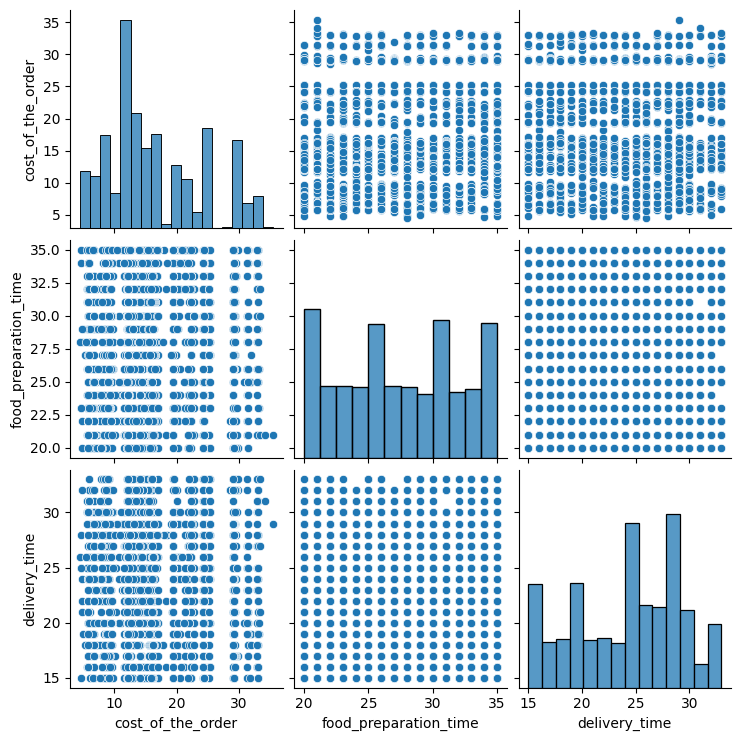

In [64]:
# Plot the pair plots to see if there any relationships among the numerical data
sns.pairplot(data=df_copy)
plt.show()

<Axes: >

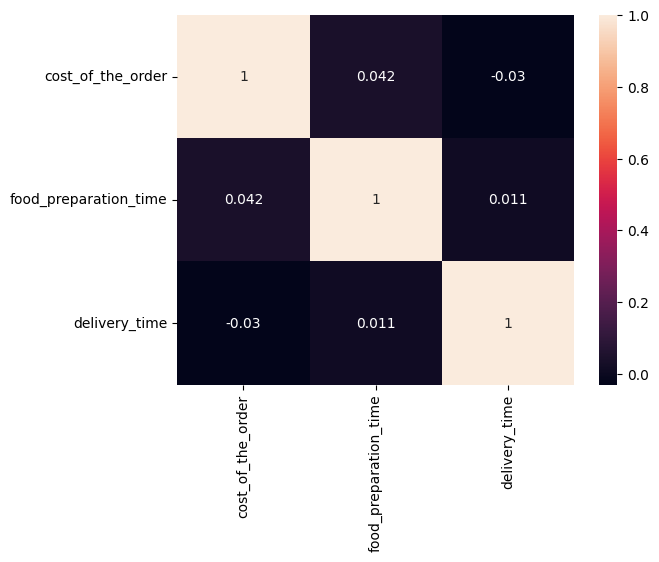

In [39]:
cors = df_copy.select_dtypes(include='number').corr()
sns.heatmap(cors, annot=True)

# Observation
* Seems like there is no relation b/w the cost_of_the_order, food_preparation_time and delivery_time.

# Examine the categorical to numerical relationships

* It do not make sense to compare the reastaurant name with cost of order or food preparation time or delivery time. So, ignoring this column

# Cuisine
Cuisine refers to a style or method of cooking, especially as characteristic of a particular country, region, or establishment. It encompasses a set of culinary practices, traditions, ingredients, and cooking techniques associated with a specific cultural or geographical area. Cuisine reflects the cultural, historical, and social aspects of a community or region and often plays a significant role in its identity.

* Different cuisine will require different ingredients thus the cost will vary.
* Different cuisine will require different method of cooking based on the techniques and ingredients, thus the preparation time will vary
* It will have no relation with the delivery time

# cuisine Vs food_preparation_time

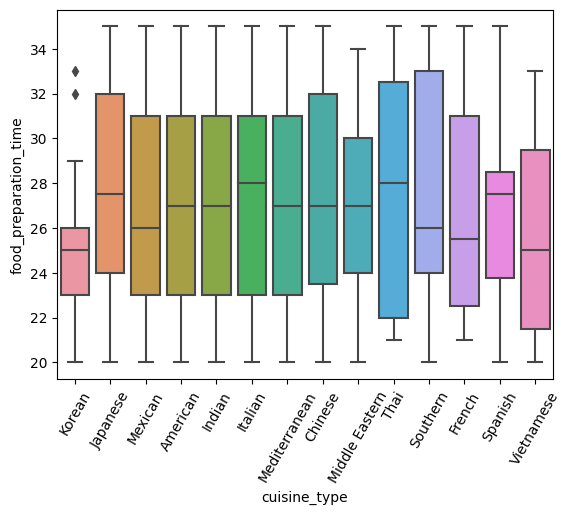

In [40]:
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=60)
plt.show()

# Observation
* There are outliers for the `Korean` cuisine_type

# cuisine_type Vs cost_of_the_order

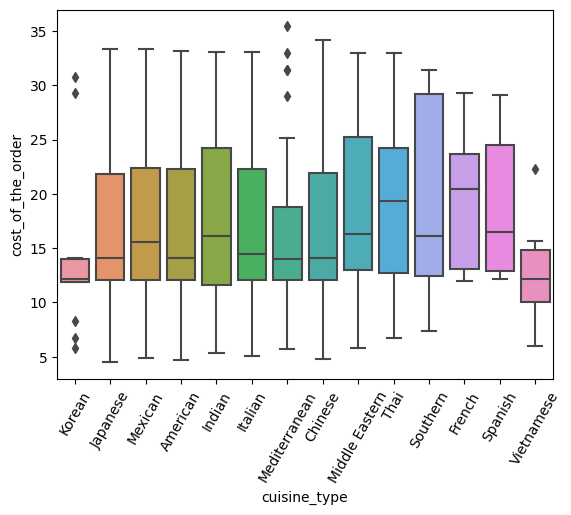

In [41]:
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=60)
plt.show()

# Observation
* There are outliers for the cuisine_types `Korean`, `Mediterranean` and `Vietnamese`

# Day Of Week
* Usually, the traffic on the weekends is expected to be less compare to the week days. Therefore the delivery time will have vary based on this

# Day of Weeek Vs Delivery Time

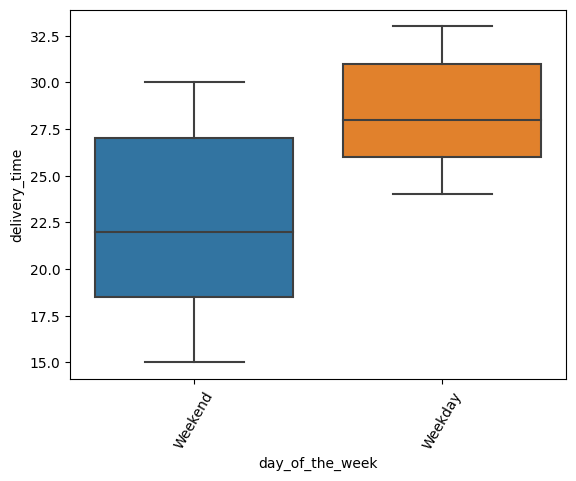

In [42]:
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.xticks(rotation=60)
plt.show()

# Observation
* The delivery time during weekdays is always greater than the delivery time during weekends

# Day of Weeek Vs Food Preparation Time

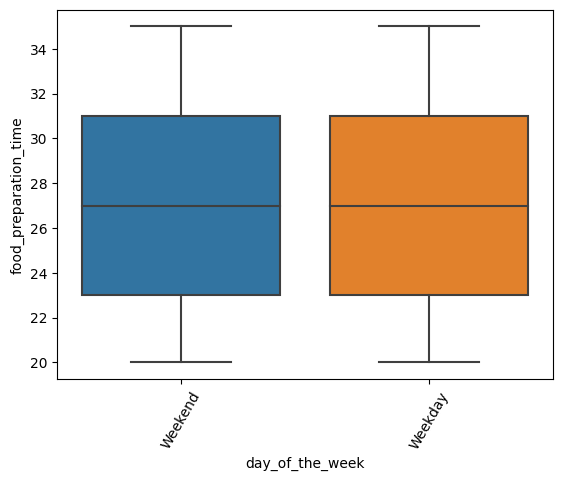

In [43]:
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time')
plt.xticks(rotation=60)
plt.show()

# Observation
* The food_prepartion_time is almost same on weekday or weekend

# Day of Week Vs Cuisine

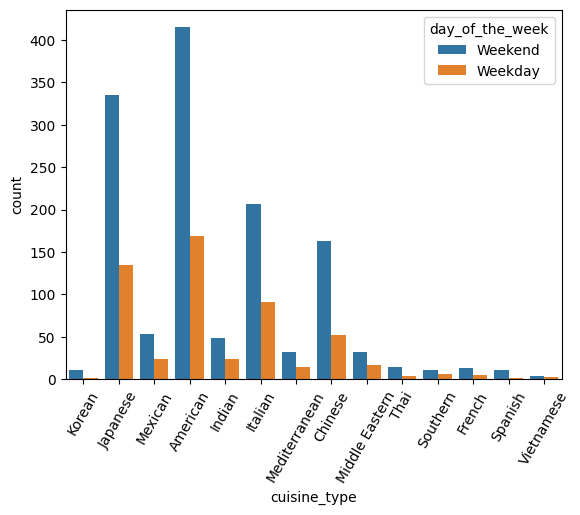

In [44]:
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation = 60)
plt.show()

# Observation
* The cuisine_types seems to have high demand over the weekends vs weekdays
* The cuisine_type itself seem to follow the same trend in both weekdays and weekends

# Rating
* Rating is mostly to do with the customer service, food quality and taste. So, it make sense to compare with the restaurants.
* Rating should be numerical. But we observed that there is a _Not given_ string as well. We need a way to convert this value into some numeric form. But because this is not in the scope of this exercise, let us filter out these rows and work on the remining orders to explore rating aspect

In [45]:
# take subset of records which are having the rating given
df_rating = df[df.rating != 'Not given'].copy()
df_rating.rating.value_counts()

rating
5    588
4    386
3    188
Name: count, dtype: int64

In [46]:
df_rating.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

In [47]:
# convert the object type to int for rating field
def convertToInt(val):
    return int(val)
df_rating['rating_num'] = df_rating.rating.apply(convertToInt)
df_rating.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
rating_num                 int64
dtype: object

# rating Vs Restaurant Name

In [48]:
# list all the 5 rated resturants
df_rating[df_rating.rating_num == 5].restaurant_name.value_counts()

restaurant_name
Shake Shack                  60
The Meatball Shop            53
Blue Ribbon Fried Chicken    32
Blue Ribbon Sushi            32
RedFarm Broadway             18
                             ..
UVA Wine Bar & Restaurant     1
V-Nam Cafe                    1
Amma                          1
Hatsuhana                     1
'wichcraft                    1
Name: count, Length: 121, dtype: int64

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [49]:
# Write the code here
# Get all the restaurants whose rating count is more than 50
# Since we have already filtered out the "Not given" rows. We shall be using the df_rating Dataframe
reasturant_rating_val_counts = df_rating.restaurant_name.value_counts()
restaurnts_with_more_than_50  = reasturant_rating_val_counts[reasturant_rating_val_counts > 50]
restaurnts_with_more_than_50

restaurant_name
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
Name: count, dtype: int64

# Observation
* There are only four reasturants which are having more than 50 rating values. They are:
  * Shake Shack
  * The Meatball Shop
  * Blue Ribbon Sushi
  * Blue Ribbon Fried Chicken

In [50]:
# Compute the average rating of these restaurants
# frame the condition where the reasturant_name column is matching any name in the given list of `restaurnts_with_more_than_50.index`
cond = df_rating.restaurant_name.isin(restaurnts_with_more_than_50.index)
# apply the condition, group by the reasturant names, take the rating column and compute the average
avg_ratings = df_rating[cond].groupby(['restaurant_name'])['rating_num'].mean()
# ensure the avergae ratings are greater than 4
highly_rated_restaurants = avg_ratings[avg_ratings > 4]
# display the highly rated restaurants
highly_rated_restaurants


restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating_num, dtype: float64

#### Observations:
The restaurants that are eligilble for the offer are:
1. The Meatball Shop
2. Blue Ribbon Fried Chicken
3. Blue Ribbon Sushi
4. Shake Shack

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [51]:
# Create a function to compute the revenue of the company for a given order
def company_revenue_model(order_cost):
    if(order_cost > 20):
        return order_cost * 0.25 # 25% on the order cost
    elif(order_cost > 5):
        return order_cost * 0.15 # 15% on the order cost
    else:
        return 0 # Assuming the company do not charge anything if the order is below 5 dollars

In [52]:
# Let us create a new column 'company_revenue' which will hold the company revenue for each order
df['company_revenue'] = df.cost_of_the_order.apply(company_revenue_model)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,company_revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [53]:
# Net revenue is going to the sum of company revenue across all the orders
net_revenue = df.company_revenue.sum()
net_revenue

6166.303

#### Observations:
* The Net Revenue generated by the company across all the orders is: **6166.303 dollars**

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [54]:
# Write the code here
df['order_completion_time'] = df.food_preparation_time + df.delivery_time
df.head() 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,company_revenue,order_completion_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [55]:
# Find the number of orders that took more than 60 minutes for the order completion
count_orders_above_60_minutes = len(df[df.order_completion_time > 60])
percentage = (count_orders_above_60_minutes / len(df)) * 100
print(f"The percentage of orders which took more than 60 minutes for thier completion is: {np.round(percentage, 2)}%")

The percentage of orders which took more than 60 minutes for thier completion is: 10.54%


#### Observations:
* The percentage of orders which took more than 60 minutes for thier completion is: 10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [56]:
# Write the code here
day_of_the_week_delivery_time = df.groupby('day_of_the_week').delivery_time.mean()
day_of_the_week_delivery_time

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

In [57]:
type(day_of_the_week_delivery_time)

pandas.core.series.Series

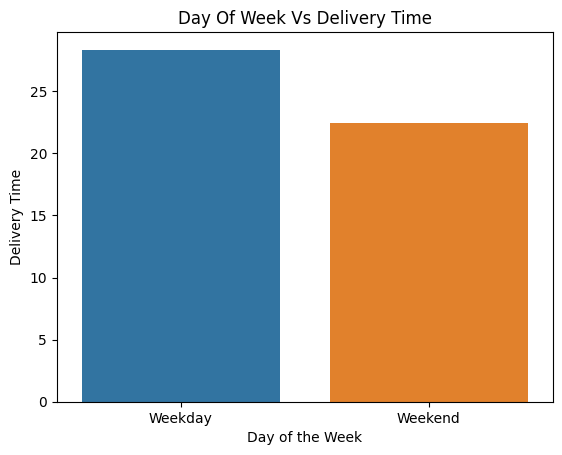

In [58]:
sns.barplot(x=day_of_the_week_delivery_time.index, y=day_of_the_week_delivery_time.values)
# Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.title('Day Of Week Vs Delivery Time')
plt.show()

#### Observations:
* The delivery time during week day is usually higher than the delivery times during weekend

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  About 38.8%(736) of the orders are not rated.
    * Could this be because:
        * The rating feature is introduced into the FoodHub app later?
        * The users are not concerned about rating every order?
        * Were there technical issues in the system while users are rating?
        * The rating UI is not in the right place to encourage users to rate?
* The cost_of_the_order seem to be multi modal
    * The peak between 10 to 15 dollars can be related to `Students` and
    * The peaks above 20 dollar range can be related to `Busy professionals`
* The delivery_time seem to be greater during weekdays than in comparision with the weekends
* The demand of food orders seem to be high during the weekends.
* The cuisine_type `American`, `Japanese` and `Italian` seem to be the preferred choice in most of the orders
* The `Shake Shack` seem to be receiving the highest number of orders but is leading thrid position in terms of the ratings. There is a scope for improvement in terms of service quality.
* The `Meatball Shop` seem to be receiving the second highest number of orders and is leading top position in terms of the ratings. There is a scope to promote more to receive more orders.
* There seem to be special category of people who are preferring `Mediterranean` and `Vietnamese` by paying more money. Mostly they shall be some sub set of `Busy Professionals`

### Recommendations:

* The rating feature shall be made easily accessible to the users if not done already. May be a rewarding system shall be introduced in order to encourage the users give the rating.
* It will be good to accomodate more staff during the weekends and have less staff during the weekdays as per the demand to save on people maintainance like salaries, fuel etc.,
* It will be good to have more staff allocated near popular restaurants like `Shake Shack` and `Meatball Shop` to meet the demand and ensure the lesser travel time
* Special marketing campigns shall be designed to boost the sales during weekdays
* On the promotional offers side, the FoodHub company must define more granular rules. Otherwise the company is ending up giving the offers to more restaurants. In our case 4 restaurants were eligible for the offer 

---